# HW 4
## Tim Demetriades
### AAI 646 - B - Hong Man
4/30/2022

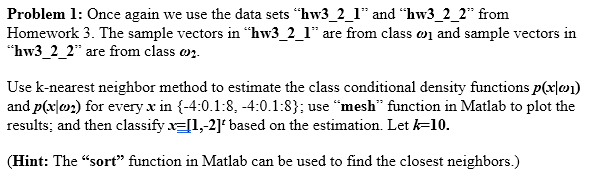

First the data is loaded in and some things are initialized.

In [2]:
import numpy as np
import scipy.io as io
from math import sqrt

In [3]:
hw4_1_1 = io.loadmat('hw3.mat')['hw3_2_1']
hw4_1_2 = io.loadmat('hw3.mat')['hw3_2_2']

In [20]:
n = len(hw4_1_1.T)    # 100
k = 10    # number of nearest neighbors

This vector will be used to create a mesh grid so that we can scan over every x in the interval.

In [5]:
x_vector = np.linspace(-4, 8, 121)    # vector of evenly spaced nums from -4 to 8

In [6]:
X, Y = np.meshgrid(x_vector, x_vector)

In [7]:
x = np.vstack((x_vector, x_vector)).T    # 2D array of shape 100x2

The function below is used to calculate the euclidean distance between 2 vectors, which is needed for calculating the volume.

In [8]:
def dist(x, y):   
    return sqrt(np.sum((x-y)**2))    # returns euclidean distance between 2 vectors

The function below is used to calculate the distance to the k-nearest neighbor, which is needed for calculating the volume.

It first calculates the distance from a certain vector x to all of the sample training vectors provided. Then it sorts the distances from smallest to largest. Finally, it returns the k-th smallest distance, which is used to calculate the volume of the cell that contains the k-nearest neighbors around the vector x.

In [10]:
def calc_nearest_dist(x, samples, n, k):
    dist_list = []
    for i in range(n):
        distance = dist(x, samples.T[i])
        dist_list.append(distance)
    dist_list.sort()
    k_nearest_dist = dist_list[k - 1]
    return k_nearest_dist

The function below is used to calculate volume, which is needed for calculating the volume of the cell that contains the k-nearest neighbors which is used in the density calculation.

In [9]:
def calc_volume(distance):
    return np.pi * (distance ** 2)

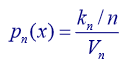

The function below calculates the density for a given vector x using the formula above. It divides k (number of nearest neighbors) by n (total number of training samples). This is then divided by the volume of the cell centered around vector x containing the k-nearest neighbors.

In [11]:
def calc_density(x, samples, n, k):
    k_nearest_dist = calc_nearest_dist(x, samples, n, k)
    volume = calc_volume(k_nearest_dist)
    density = (k / n) / volume
    return density

In [12]:
# Initialize density matrices
density_matrix_1 = np.zeros((len(x), len(x))) 
density_matrix_2 = np.zeros((len(x), len(x))) 

Here we will use the formula above to calculate the class conditional density for all of the vectors on the interval -4 to 8 (121 x 121 = 14,641 total vectors) for each of the 2 classes.

In [13]:
# Class 1
for i in range(len(x)):
    for j in range(len(x)):
        density = calc_density(np.array((x[i, 0], x[j, 1])), hw4_1_1, n, k)
        density_matrix_1[i, j] = density

# Class 2
for i in range(len(x)):
    for j in range(len(x)):
        density = calc_density(np.array((x[i, 0], x[j, 1])), hw4_1_2, n, k)
        density_matrix_2[i, j] = density

Below are the 2 density matrices obtained, each of shape 121x121.

In [14]:
density_matrix_1

array([[0.00204421, 0.00206631, 0.00209962, ..., 0.00073555, 0.00071949,
        0.00070381],
       [0.00214899, 0.00217343, 0.0021954 , ..., 0.00075107, 0.00073433,
        0.00071801],
       [0.00226187, 0.00228896, 0.00231334, ..., 0.00076689, 0.00074945,
        0.00073245],
       ...,
       [0.00079815, 0.00079962, 0.00080069, ..., 0.00044155, 0.00043397,
        0.00042654],
       [0.00077352, 0.0007749 , 0.0007759 , ..., 0.00043455, 0.00042721,
        0.00042   ],
       [0.00075   , 0.0007513 , 0.00075224, ..., 0.00042766, 0.00042055,
        0.00041356]])

In [15]:
density_matrix_2

array([[0.00030558, 0.00030925, 0.00031295, ..., 0.00056863, 0.00056242,
        0.00055614],
       [0.00031019, 0.00031416, 0.00031798, ..., 0.00058276, 0.00057623,
        0.00056965],
       [0.00031419, 0.00031901, 0.0003231 , ..., 0.00059738, 0.00059053,
        0.00058361],
       ...,
       [0.0005723 , 0.00058691, 0.00060207, ..., 0.00181852, 0.0017589 ,
        0.00170125],
       [0.00056682, 0.00058116, 0.00059601, ..., 0.00175728, 0.00170155,
        0.00164754],
       [0.00056125, 0.00057531, 0.00058986, ..., 0.00169822, 0.00164612,
        0.00159552]])

In order to plot the 3D data as a surface we will save the data as a .mat file and load it into MATLAB, and then from there use the mesh function to graph it.



In [16]:
io.savemat('hw4_1_results.mat', dict(x = X, y = Y, z1 = density_matrix_1, z2 = density_matrix_2))

**Class 1 Density**

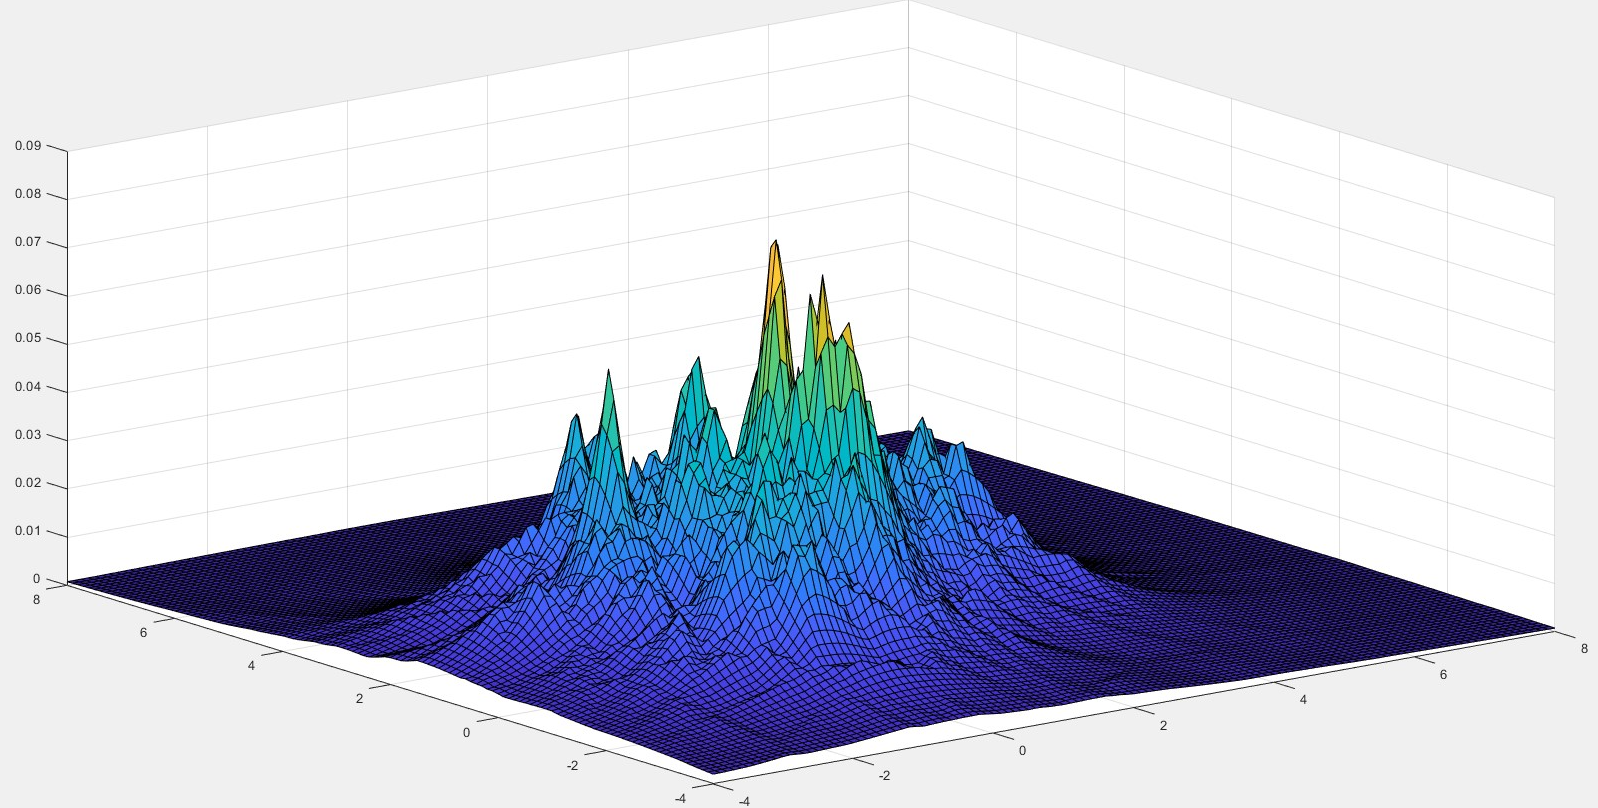

**Class 2 Density**

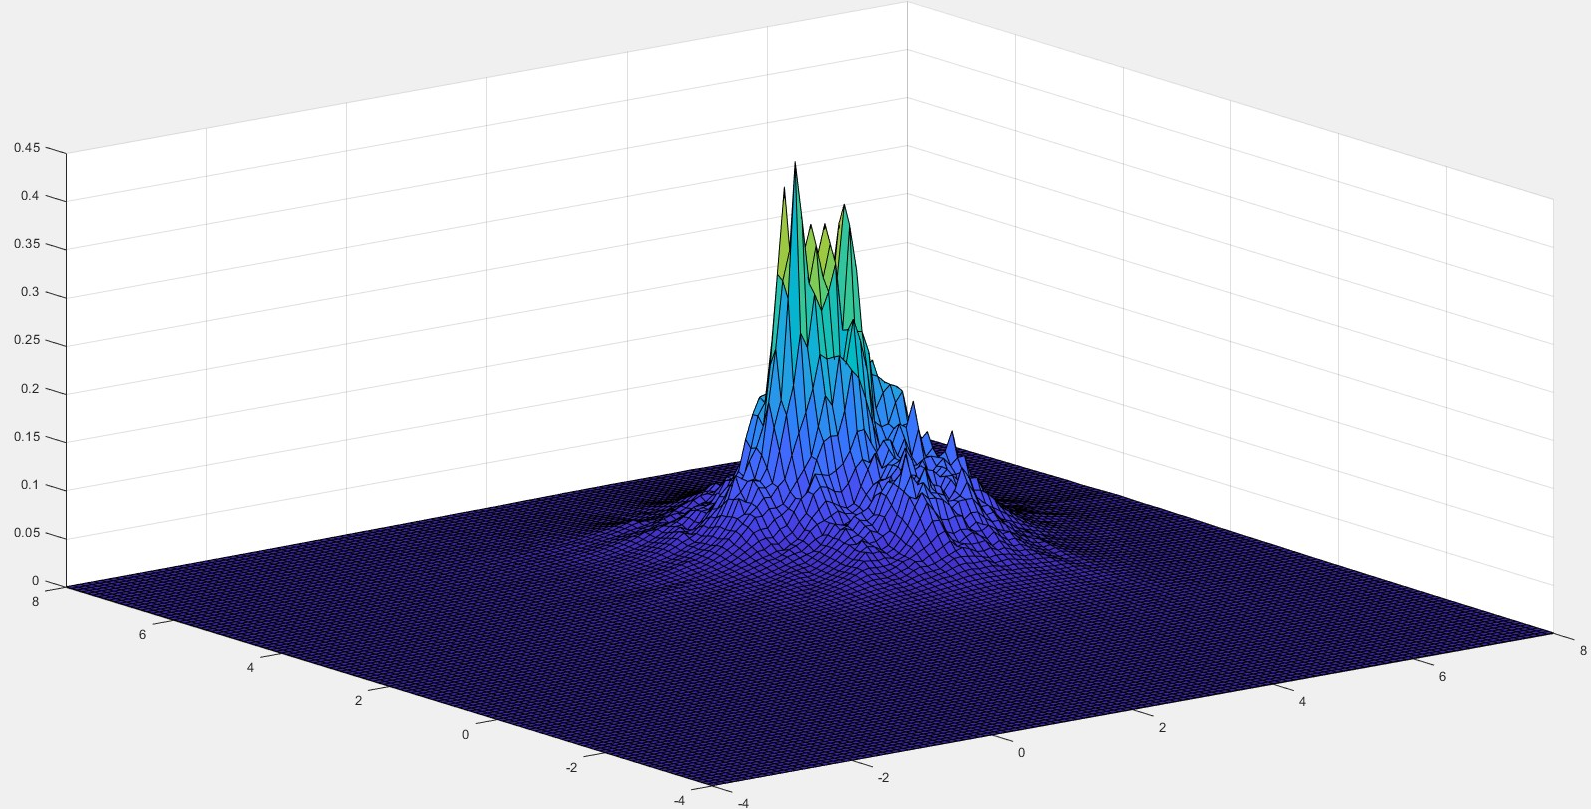

Now we will take the sample point x = [1, -2] and try to classify it based on the estimation.

In [17]:
sample_point = np.array((1, -2))

In [18]:
calc_density(sample_point, hw4_1_1, n, k)

0.02763684158524515

In [19]:
calc_density(sample_point, hw4_1_2, n, k)

0.001021215373465318

Above we can see the two likelihoods for the given sample vector. Since the value for Class 1 (0.0276) is greater than for Class 2 (0.0010) we can say this sample belongs to **Class 1**. This makes sense looking at the graphs, as the graph for Class 1 has a much higher peak for the location of the test sample compared to the graph of Class 2